In [1]:
import importlib
import sys
import pickle
import numpy as np
import pandas as pd

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')

In [2]:
with open("Sepsis_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../evaluation_results/Sepsis/gn_l4']

/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/notebooks/evaluation_metric_notebooks/eval_normal_4layer/Sepsis/../../../../../src/evaluation_metrics/plots.py:214: SyntaxWarning: invalid escape sequence '\#'
  linestyle='--', color='gray', label='\# instances' if pgf else '# instances')
/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/notebooks/evaluation_metric_notebooks/eval_normal_4layer/Sepsis/../../../../../src/evaluation_metrics/plots.py:325: SyntaxWarning: invalid escape sequence '\#'
  linestyle='--', color='gray', label='\# instances' if pgf else '# instances'
/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/notebooks/evaluation_metric_notebooks/eval_normal_4layer/Sepsis/../../../../../src/evaluation_metrics/plots.py:414: SyntaxWarning: invalid escape sequence '\#'
  linestyle='--', color='gray', label='\# instances' if pgf else '# instances'


In [3]:
with open("../../../../reimplemented_comparable_approaches/camargo_LSTM_suffix_pred/notebooks/evaluation/Sepsis/Sepsis_eval.pkl", "rb") as file:
    camargo_results = pickle.load(file)


camargo_raw, camargo_c = camargo_results['../../../../../../../../data/Sepsis/eval_camargo_sl5/']

with open("../../../../reimplemented_comparable_approaches/weytjens_unc_rem_time/notebooks/evaluation/Sepsis/Sepsis_eval.pkl", "rb") as file:
    weytjens_results = pickle.load(file)

weytjens_raw, weytjens_c = weytjens_results['../../../../../../../../data/Sepsis/eval_weytjens_sl5/']

dict_keys(['NormalizedDamerauLevenshteinMeanVar_activity', 'RemainingTime_SUM_Mean_MAE_outliers', 'RemainingTime_SUM_Abs_Mean_MAE_outliers', 'RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'RemainingTime_PIT', 'EventElapsed_PIT', 'SuffixCountMAE', 'SumValuesInterval_50', 'SumValuesInterval_75', 'SumValuesInterval_90', 'SumValuesInterval_95', 'SumValuesInterval_99', 'LastValueInterval_50', 'LastValueInterval_75', 'LastValueInterval_90', 'LastValueInterval_95', 'LastValueInterval_99', 'SuffixCountInterval_50', 'SuffixCountInterval_75', 'SuffixCountInterval_90', 'SuffixCountInterval_95', 'SuffixCountInterval_99', 'EventLabelCountInterval_50', 'EventLabelCountInterval_75', 'EventLabelCountInterval_90', 'EventLabelCountInterval_95', 'EventLabelCountInterval_99'])


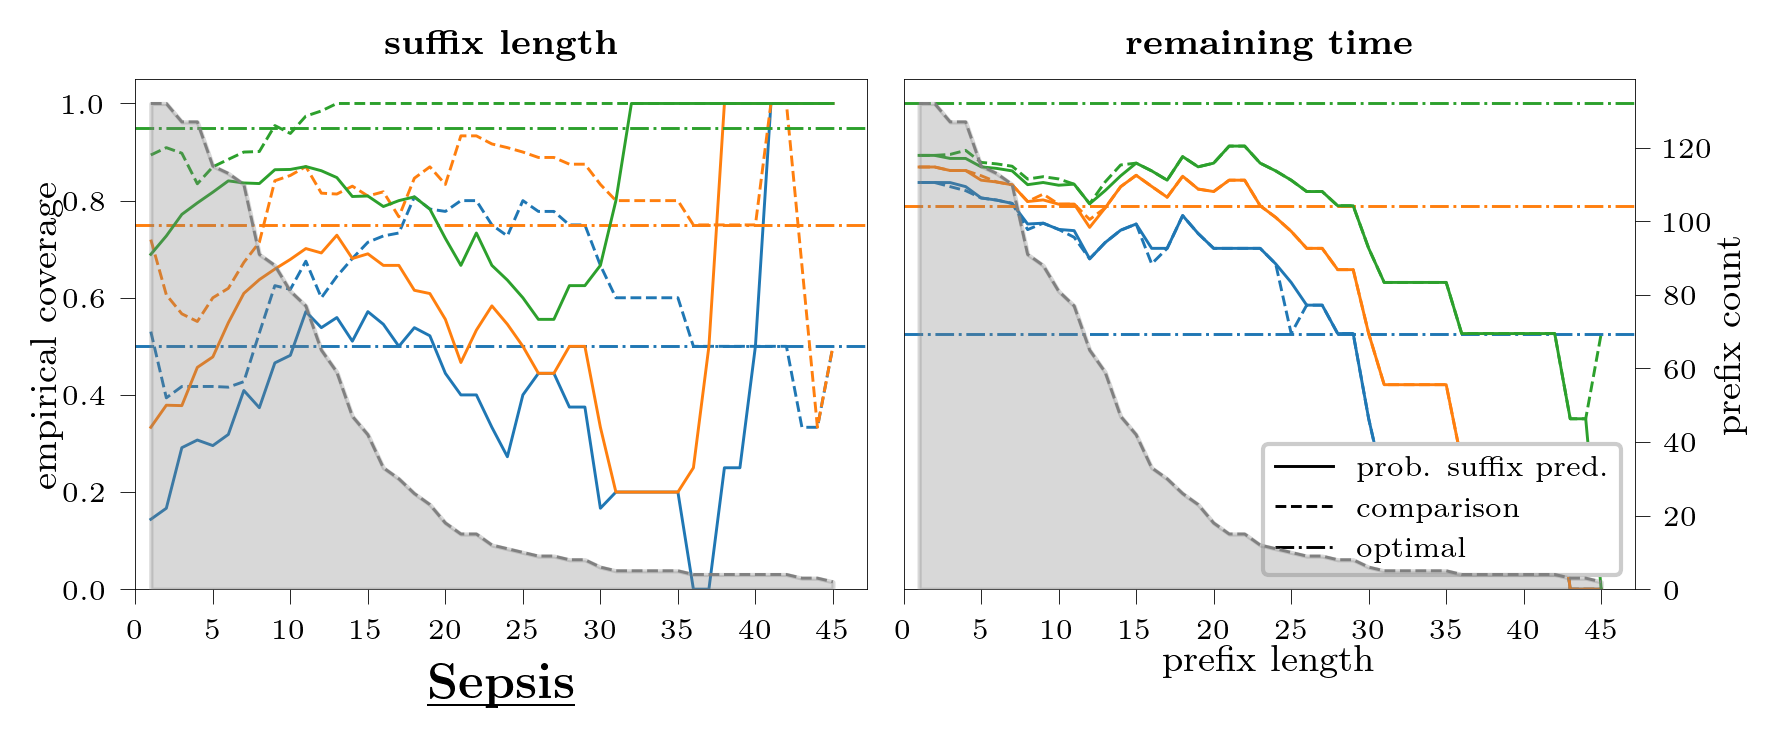

In [4]:

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)


keys_to_keep = [
                ('SumValuesInterval_50', 'SumValuesInterval_50'),
                ('SumValuesInterval_75', 'SumValuesInterval_75'),
                ('SumValuesInterval_95', 'SumValuesInterval_95'),
]
keys_to_keep = [
                ('LastValueInterval_50', 'LastValueInterval_50'),
                ('LastValueInterval_75', 'LastValueInterval_75'),
                ('LastValueInterval_95', 'LastValueInterval_95'),
]

print(res_raw.keys())
res_1 = {(k, label) : res_raw[k] for k, label in keys_to_keep}

keys_to_keep = [
                ('LastValueInterval_50', 'LastValueInterval_50'),
                ('LastValueInterval_75', 'LastValueInterval_75'),
                ('LastValueInterval_95', 'LastValueInterval_95'),
]

wey_res = {(k, label) : weytjens_raw[k] for k, label in keys_to_keep}

keys_to_keep = [
                ('SuffixCountInterval_50', 'SuffixCountInterval_50'),
                ('SuffixCountInterval_75', 'SuffixCountInterval_75'),
                ('SuffixCountInterval_95', 'SuffixCountInterval_95'),
]

res_2 = {(k, label) : res_raw[k] for k, label in keys_to_keep}
cam_res = {(k, label) : camargo_raw[k] for k, label in keys_to_keep}



p = src.evaluation_metrics.plots.plot_2_4_intervals(res_2, res_1, cam_res, wey_res, caption='Sepsis', pgf=True)#int(len(keys_to_keep)))

with open('Sepsis_intervals_comparison_suffix.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Suffix Count: 50%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_50'].values()]))
print('Suffix Count: 75%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_75'].values()]))
print('Suffix Count: 95%')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountInterval_95'].values()]))

Suffix Count: 50%
0.37411764705882355
Suffix Count: 75%
0.5452941176470588
Suffix Count: 95%
0.8011764705882353


In [6]:
print('Suffix Count: 50%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_50'].values()]))
print('Suffix Count: 75%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_75'].values()]))
print('Suffix Count: 95%')
print(np.mean([i['prob'][0] for i in camargo_raw['SuffixCountInterval_95'].values()]))

Suffix Count: 50%
0.5435294117647059
Suffix Count: 75%
0.7211764705882353
Suffix Count: 95%
0.9294117647058824


In [7]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in res_raw['SumValuesInterval_95'].values()]))

Remainging Time: 50%
0.6423529411764706
Remaining Time: 75%
0.7688235294117647
Remaining Time: 95%
0.8470588235294118


In [8]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in res_raw['LastValueInterval_95'].values()]))


Remainging Time: 50%
0.7141176470588235
Remaining Time: 75%
0.7664705882352941
Remaining Time: 95%
0.8070588235294117


In [9]:
print('Remainging Time: 50%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_50'].values()]))
print('Remaining Time: 75%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_75'].values()]))
print('Remaining Time: 95%')
print(np.mean([i['prob'][0] for i in weytjens_raw['LastValueInterval_95'].values()]))


Remainging Time: 50%
0.7105882352941176
Remaining Time: 75%
0.768235294117647
Remaining Time: 95%
0.8141176470588235
